# Problem 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv ("Advertisment.csv")

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

In [6]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Now let's showcase the relationship between the feature and target column

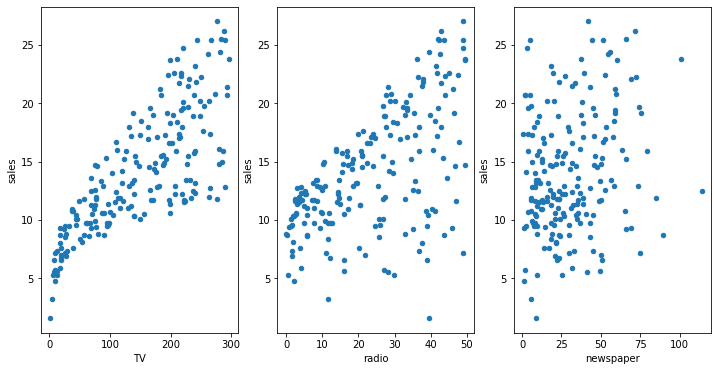

In [7]:
fig, axs = plt.subplots(1,3)

data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(12,6))

data.plot(kind='scatter', x='radio',y='sales', ax=axs[1])

data.plot(kind='scatter', x='newspaper',y='sales', ax=axs[2])
fig.savefig ('testdata.jpg')


In [8]:
X = data[["TV"]]
Y = data.sales
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression()

In [9]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [10]:
lm.predict([[50]])

C:\Users\jaisw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

In [11]:
from sklearn.metrics import r2_score


In [12]:
predicted_sales = lm.predict(X)

In [13]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
predicted_sales

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

In [15]:
r2_score(y_true=Y, y_pred=predicted_sales)

0.611875050850071

In [16]:
X = data[["TV", "radio", "newspaper"]]
Y = data.sales
lm = LinearRegression()
lm.fit(X, Y)
print('intercept: ', lm.intercept_)
print('tv :', lm.coef_[0])
print('radio :', lm.coef_[1])
print('newspaper :', lm.coef_[2])

intercept:  2.9388893694594085
tv : 0.045764645455397615
radio : 0.18853001691820456
newspaper : -0.0010374930424763272


In [17]:
X = data[["TV", "radio", "newspaper"]]
Y = data.sales
lm.fit(X, Y)
predicated_sales = lm.predict(X)
r2_score(Y,predicated_sales)

0.8972106381789522

In [18]:
X = data[["TV", "radio"]]
Y = data.sales
lm.fit(X, Y)
predicated_sales = lm.predict(X)
r2_score(Y,predicated_sales)

0.8971942610828956

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
warnings.filterwarnings('ignore')

In [25]:
data1=pd.read_csv('Admission_prediction.csv')

In [27]:
data1.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
data1.shape

(400, 9)

In [29]:
data1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [30]:
data1['University Rating'] = data1['University Rating'].fillna(data1['University Rating'].mode()[0])
data1['TOEFL Score'] = data1['TOEFL Score'].fillna(data1['TOEFL Score'].mean())
data1['GRE Score'] = data1['GRE Score'].fillna(data1['GRE Score'].mean())

In [33]:
data1.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [34]:
data1= data1.drop(columns = ['Serial No.'])
data1.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
